# PID Controller Simulation

## Leaning Objectives

After completing this exercise, the student will be able to:
- Create a simple model for a PID controller (**Exercise 1**,**Exercise 2**)
- Numerically integrate and differentiate a moving body (**Exercise 2**)
- Understanding the effects of an integration term and a derivative term on the system response (**Exercise 2**)
- (Bonus) Explore the effects of a more complex system on the PID controller response (**Exercise 3**)

## Introduction
Small drones are now a part of everything from warehouse automation to areal photography. And keeping them stable in the air is crucial to their success. Suppose we want to keep at exactly 10 meters above the grpund. This seems easy - just apply enough thrust to counteract gravity, right?

But how do we know how much thrust to apply? And what if the environment isn't still? A gust of wind could push the drone up or down, and we need to adjust the thrust accordingly. How do we do that smoothly, and without the drone oscillating up and down?

This is a common problem in <a href="https://en.wikipedia.org/wiki/Control_theory">Control theory</a>. To keep the drone flying steadily at the right height, we need a way to adjust how much thrust force to apply. One method for doing this is by using a **PID controller**. PID stands for Proportional, Integral, and Derivative, and it is a type of feedback controller that figures out how much thrust to apply based on how far the drone is fromt the target height.

It does this by looking at three things:
1. **Proportional (P)**: How far is the drone from the desired height right now? If it is too low, increase thrust. If it is too high, reduce thrust.
2. **Integral (I)**: Has the drone been off target for a while? If it is been too low for a long time, gradually increase thrust to correct for that. This helps remove any steady offset.
3. **Derivative (D)**: How fast is the height changing? If the drone is rising too quickly, reduce thrust to prevent overshooting. If it is falling quickly, increase the thrust to slow the descent.

The only things the PID controller needs to know are the true height of the drone and the target height. It continously compares the two to calculate the difference between them, known as the **error**, and then uses the P, I and D components to decide how much thrust to apply.


In this project, we will simulate a 1-dimensional PID controller that attempts to keep a drone stable at a desired hight. We will explore how different terms in the PID controller affects the response, and see how a seemingly simple feedback loop can yield powerful control behavior.

## 1. Free Body Diagram
Before we can simulate the PID controller, we need to understand the forces acting on the drone. To do this, we will now create a free body diagram to visualize these forces.

Sketch the system and draw a free body diagram of a drone hovering at a target height $h$. Since we are working in one dimension (vertical), horizontal forces can be ignored. The drone is affected by two main forces: gravity, pulling it downward, and thrust, pushing it upward. The thrust force is controlled via the drone’s "gas pedal", which adjusts how much upward force is applied to counteract gravity. 

How would the free body diagram look for a heavier drone? 

Solution: For a heavier drone, both arrows would need to be longer. The reason for this is that the gravitational force acting on the drone is proportional to its mass. A heavier drone would require more thrust to counteract the increased gravitational force, resulting in arrows in the free body diagram.

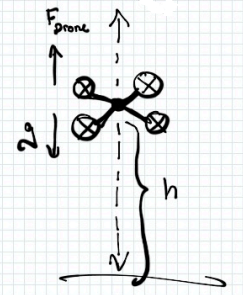




## 2. The P Controller

We will start by implementing the proportional (P) component of the PID controller. A proportional controller adjusts its output based on how far the drone is from the target height. Meaning, the larger the difference, the stronger the response.
In our case, the controller output is the thrust force applied to the drone, which we write as a function of time $u(t)$. The error is the difference between the target height and the current height of the drone:
$$
u(t) = K_P e(t)
$$
where $K_P$ is the proportional gain, $e(t)$ is the error at time $t$, and $u(t)$ is the resulting thrust force.

A larger error means more thrust. In this section, we will see how a proportional controller alone affects the drones motion, and why it is often not enough on its own. 


### 2 a) Finding the acceleration
To simulate the drone's motion, we need to calculate the vertical acceleration. This is done by finding the net force acting on the drone, which is the difference between the thrust force and the gravitational force. The gravitational force is constant and can be represented as $F_g = m \cdot g$, where $m$ is the mass of the drone and $g$ is the acceleration due to gravity (approximately 9.81 m/s²).

Using Newton's second law $F=ma$, show that the drone's acceleration can be expressed as a function of the thrust force $u(t)$ and the gravitational force $F_g$.

Solution: $$ a(t) = \frac{u(t) - F_g}{m} = \frac{u(t) - mg}{m}$$

### 2 b) Implementing the acceleration function

Using the expression for acceleration, implement the function `acceleration(u, m, g)` that calculates the vertical acceleration of the drone.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
def acceleration(u, m, g):
    """
    Calculates the net vertical acceleration of the drone.
    """
    return (u - m * g) / m

### 2 c) The proportional component
Now we have implemented a function for acceleration. But as you can see, the acceleration depends on the thrust force $u(t)$, which we have not yet defined.

In this subsection, we want to implement two more functions:
1. `proportional_component(K_P, error)` that calculates the thrust force $u(t)$ based on the error $e(t)$ and the proportional gain $K_P$.
2. `error(target_height, current_height)` that calculates the error $e(t)$ as the difference between the target height and the current height of the drone.

These are the last two pieces we need to implement the proportional component of the controller.

In [7]:
def calculate_error(target_height, current_height):
    """
    Calculates the difference between the target height and the current height of the drone.
    """
    return target_height - current_height

def proportional_component(K_P, error):
  
    return K_P * error


### 2 d) Simulate the P controller

Now that we have all the pieces, we are ready to simulate the movement of the drone using the proportional controller.

In the following code section, you will have to implement the Euler Cromer method to numerically integrate the velocity and position of the drone. The Euler Cromer method is a numerical method for solving ordinary differential equations. It is commonly used for simulating physical systems when we know the acceleration of the system. The method is an extension of the Euler method, but is a way more stable and reliable method. 
The Euler Cromer method in this system will look like this:

\begin{align*}
    v(t + \Delta t) &= v(t) + a(t) \Delta t\\
    r(t + \Delta t) &= r(t) + v(t + \Delta t) \Delta t
\end{align*}
where $v(t)$ is the velocity at time $t$, $r(t)$ is the position at time $t$, and $\Delta t$ is the time step.

 

In [8]:
## initialize the system
m = 1.0  # mass
setpoint = 10.0 # desired position
start_position = 0.0 # initial position
start_velocity = 0.0 # initial velocity
g = 9.81  # gravitational acceleration
K_P = 5.0  # proportional gain


n = 500
T = np.linspace(0, 20, n)  # time vector
dt = T[1] - T[0]  # time step

position = np.zeros(n)  # position
velocity = np.zeros(n)  # velocity
accelerations = np.zeros(n)  # acceleration
position[0] = start_position  # set initial position
velocity[0] = start_velocity  # set initial velocity


# Euler cromer method for numerical integration
for i in range(1, n):
    # Calculate the control input using the proportional term
    error = calculate_error(setpoint, position[i-1])
    u = proportional_component(K_P, error)

    # Calculate the acceleration
    accelerations[i] = acceleration(u, m, g)

    # Update velocity and position using Euler-Cromer method
    velocity[i] = velocity[i-1] + accelerations[i] * dt
    position[i] = position[i-1] + velocity[i] * dt

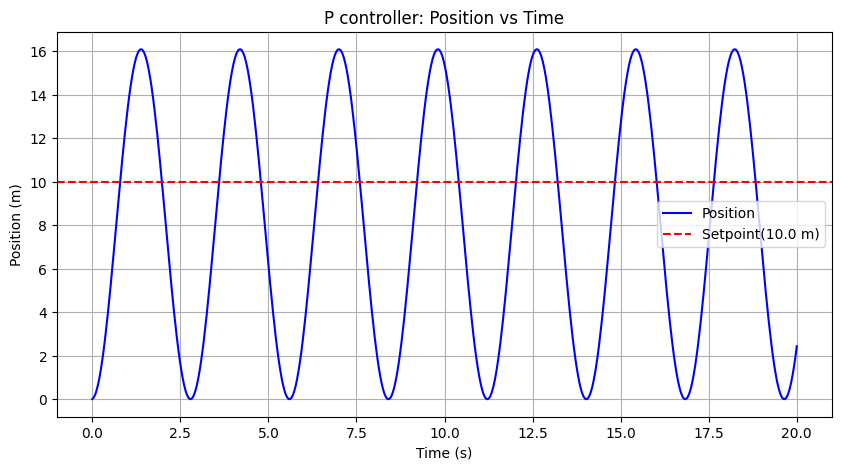

In [9]:
# plot the results
plt.figure(figsize=(10, 5))
plt.plot(T, position, label='Position', color='blue')
plt.axhline(setpoint, color='red', linestyle='--', label=f'Setpoint({setpoint} m)')
plt.title('P controller: Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid()
plt.show()    

Your results might look pretty bad at first, but that is expected. The P controller is not very good at keeping the drone stable. Therefore, the next step is to introduce the derivative term to the controller.

## 3) PD controller
We have just witnessed the limitations of a P controller. It only reacts to the current error, meaning the difference between the setpoint and the measurement position, without considering how the error is changing over time. This often leads to overshooting and oscillations in the system.

To improve the controller, we will introduce a derivative term, D, which responds to the rate of change of the error. This allows the controller to anticipate where the system is heading, not just where it is not. In other words, the derivative term acts as an anticipatory control, pushing back harder when the error is changing rapidly and backing off when things are stabilizing. It effectively adds damping, which helps to smooth out the response and prevent overshooting.

Mathematically, the controller signal is now proportinal to both the error and its derivative:
$$u(t) = K_p e(t) + K_D \frac{∂ e(t)}{∂ t}$$

The next thing we need to do is to implement the derivative of the error into the simulation. A simple way of calculating the derivative is to use the difference between the current and previous error:
$$\frac{∂ e(t)}{∂ t} = \frac{e(t) - e(t-1)}{Δt}$$

Fill in the function `derivative_term(K_D, error, previous_error, dt)` below and do another Euler Cromer simulation with the PD controller. Plot the result and see how the result changes compared to the P controller. 

In [11]:
def derivative_component(K_D, current_error, previous_error, dt):
    """
    Derivative term for a PID controller: K_D ⋅ (∂ e(t))/(∂ t).
    """
    derivative = (current_error - previous_error) / dt
    return K_D * derivative

In [19]:
K_P = 5.0  # proportional gain
K_D = 5.0  # derivative gain

position = np.zeros(n)  # position
velocity = np.zeros(n)  # velocity
accelerations = np.zeros(n)  # acceleration
position[0] = start_position  # set initial position
velocity[0] = start_velocity  # set initial velocity

previous_error = calculate_error(setpoint, position[0])  # initialize previous error

for i in range(1, n):
    error = calculate_error(setpoint, position[i-1])  # calculate error

    # Calculate the control input using the proportional term
    P = proportional_component(K_P, error)

    # Calculate the derivative term
    D = derivative_component(K_D, error, previous_error, dt)

    u = P + D # add derivative term to control input

    # Calculate the acceleration
    accelerations[i] = acceleration(u, m, g)

    # Update velocity and position using Euler-Cromer method
    velocity[i] = velocity[i-1] + accelerations[i] * dt
    position[i] = position[i-1] + velocity[i] * dt

    previous_error = error  # update previous error for next iteration

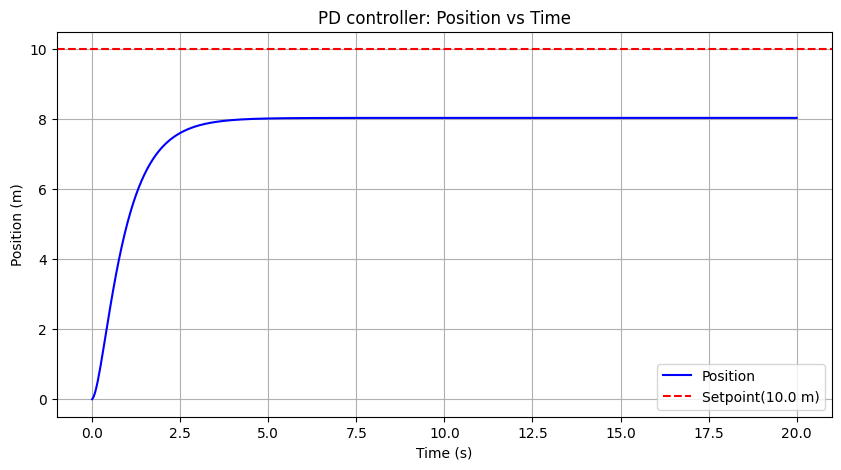

In [20]:
# plot the results
plt.figure(figsize=(10, 5))
plt.plot(T, position, label='Position', color='blue')
plt.axhline(setpoint, color='red', linestyle='--', label=f'Setpoint({setpoint} m)')
plt.title('PD controller: Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid()
plt.show()    

Hopefully, you have now seen an improvement in the stability of the drone. The PD controller is much better at keeping the drone stable, than when we only had the P controller. But we can still see that we are not quite there yet. Again, do not worry, we will improve the controller once again, by adding the integral term.

## 4) PID controller
We have now seen the effects of the P and D terms in the controller. While the derivative term helps by anticipating the changes in error and daming the system response, the PD controller is still not perfect. Particularly when it comes to eliminating steady-state errors, where the drone hovers at a height that is not exactly the desired setpoint.

To adress this problem, we will introduce the integral term, I. The integral term accumulates the error over time, effectively "remembering"  the past errors. If there is any persistent difference between the setpoint and the measurement, the integral term will continue to grow, pushing the controller to adjust the output until the error is eliminated. This cumulative effect is what allows the controller to eliminate residual or static errors that the proportinal term alone cannot handle.

As the error decreases, the contribution of the from the proportinal term naturally weakens, but the integral term, having built up over time, continues to drive the output until the error is zero. Once the error reaches zero, the integral term stops growing, stabilizing the system.

Together, the three terms combine into a PID controller, which is defined as follows:

$$u(t) = K_P e(t) + K_I \int_0^t e(t) dt + K_D \frac{∂ e(t)}{∂ t} $$

Implement the integral of the error into the simulation by using a simple numerical integration method, such as a Riemann sum:
$$\int_0^t e(t) dt \approx \sum_{i=0}^{n} e(t_i) \Delta t$$
The Riemann sum will be accumulated in a variable, which needs to be initialized as zero, and then updated in each iteration of the simulation loop.

In [22]:
def integration_component(K_I, Riemann_sum):
    """
    Integral term for a PID controller: K_I ⋅ ∑ e(t)⋅Δt
    """
    return K_I * Riemann_sum

In [33]:
K_P = 10.0  # proportional gain
K_D = 5.0   # derivative gain
K_I = 5.0  # integral gain

position = np.zeros(n)  # position
velocity = np.zeros(n)  # velocity
accelerations = np.zeros(n)  # acceleration
position[0] = start_position  # set initial position
velocity[0] = start_velocity  # set initial velocity

previous_error = calculate_error(setpoint, position[0])  # initialize previous error
Riemann_sum = 0.0  # initialize Riemann sum for integral term

for i in range(1, n):
    # Calculate the error
    error = calculate_error(setpoint, position[i-1])
    # Update accumulated error for integral term
    Riemann_sum = Riemann_sum + error * dt  # Riemann sum approximation

    # Calculate the control input using the proportional term
    P = proportional_component(K_P, error)

    # Calculate the derivative term
    D = derivative_component(K_D, error, previous_error, dt)

    # Calculate the integral term
    I = integration_component(K_I, Riemann_sum)

    u = P + I + D  # add the components

    # Calculate the acceleration
    accelerations[i] = acceleration(u, m, g)

    # Update velocity and position using Euler-Cromer method
    velocity[i] = velocity[i-1] + accelerations[i] * dt
    position[i] = position[i-1] + velocity[i] * dt

    previous_error = error  # update previous error for next iteration

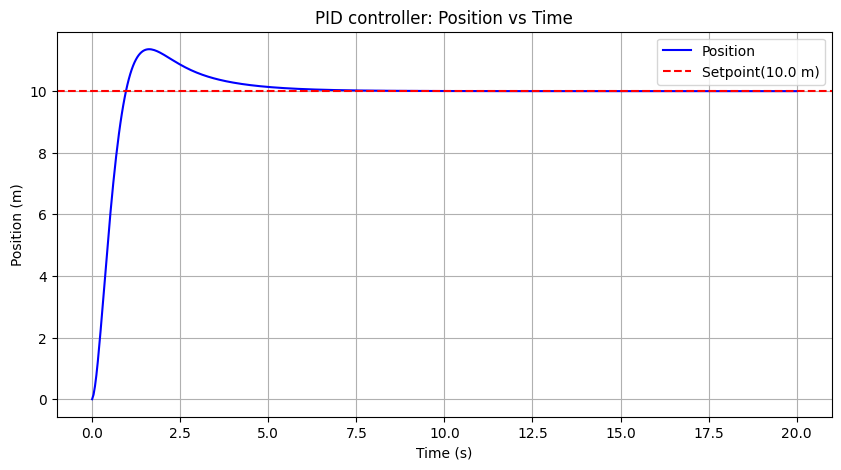

In [34]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(T, position, label='Position', color='blue')
plt.axhline(setpoint, color='red', linestyle='--', label=f'Setpoint({setpoint} m)')
plt.title('PID controller: Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid()
plt.show()

Hopefully, you have now seen a significant improvement in the stability of the drone. You should now have a PID controller that is able to keep the drone stable at the desired setpoint. 
Now, try to play around with the different gains $K_P$, $K_I$ and $K_D$ and see how they affect the response of the system. You can also try to change the setpoint and see how the controller reacts to changes in the desired altitude.

## 5. Add random effects
In the real world, there are often random effects that can affect the stability of the drone. For example, wind gusts can push the drone up or down, and we need to adjust the thrust accordingly. In this exercise, we will add a random effect to the simulation to see how the PID controller reacts to it.

We have created a few example functions, to simulate the effects lised under. Try to implement them in your simulation and see how the PID controller reacts to them. You can also try to create your own random effects and see how the controller reacts to them.
### Examples: 
- Wind gusts
- Air resistance
- Moving setpoint

### 5 a) Free body diagram with random effects
Before you implement the effects, you should first draw a free body diagram of the drone with the random effects you want to explore. How do these effects change the forces acting on the drone, and how do they affect the thrust force that the PID controller needs to apply?

*place your free body diagram here*

In [35]:
def drag_force(v, drag_coeff):
    """
    Calculates the drag force acting on the drone.
    """
    return -drag_coeff * v

def wind_force(wind_amplitude):
    """
    Randomly generates a wind
    """
    return np.random.uniform(-wind_amplitude, wind_amplitude)



In [44]:


K_P = 10.0  # proportional gain
K_D = 10.0   # derivative gain
K_I = 10.0   # integral gain

# Simulate the system with external forces
position = np.zeros(n)  # position
velocity = np.zeros(n)  # velocity
accelerations = np.zeros(n)  # acceleration
position[0] = start_position  # set initial position
velocity[0] = start_velocity  # set initial velocity


previous_error = calculate_error(setpoint, position[0])  # initialize previous error
Riemann_sum = 0.0  # initialize Riemann sum for integral term

for i in range(1, n):
    # Calculate the error
    error = calculate_error(setpoint, position[i-1])
    # Update Riemann sum for integral term
    Riemann_sum = Riemann_sum + error * dt  # Riemann

    # Calculate the control input using the proportional term
    P = proportional_component(K_P, error)

    # Calculate the derivative term
    D = derivative_component(K_D, error, previous_error, dt)

    # Calculate the integral term
    I = integration_component(K_I, Riemann_sum)

    u = P + I + D 

    # Calculate the acceleration
    accelerations[i] = acceleration(u, m, g)
    accelerations[i] =  accelerations[i] + (wind_force(wind_amplitude=5) + drag_force(velocity[i-1], drag_coeff=1))  / m  # add external forces

    # Update velocity and position using Euler-Cromer method
    velocity[i] = velocity[i-1] + accelerations[i] * dt
    position[i] = position[i-1] + velocity[i] * dt

    previous_error = error  # update previous error for next iteration

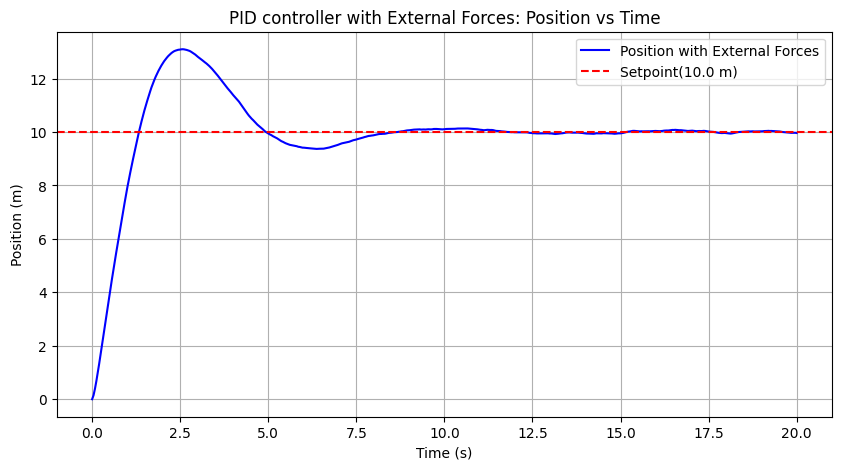

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(T, position, label='Position with External Forces', color='blue')
plt.axhline(setpoint, color='red', linestyle='--', label=f'Setpoint({setpoint} m)')
plt.title('PID controller with External Forces: Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid()
plt.show()

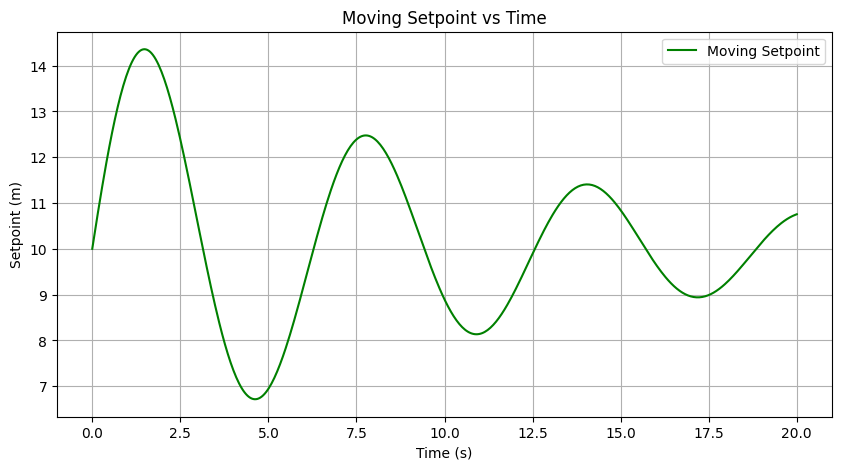

In [46]:
## Moving setpoint
def moving_setpoint(t):
    """
    Example function of a moving setpoint that changes over time.

    Parameters:
    t (float): Current time.

    Returns:
    float: Setpoint value at time t.
    """
    return 10.0 + 5.0 * np.sin(1.0 * t) * np.exp(-0.09 * t)

#plot the moving setpoint
moving_setpoints = moving_setpoint(T)
plt.figure(figsize=(10, 5))
plt.plot(T, moving_setpoints, label='Moving Setpoint', color='green')
plt.title('Moving Setpoint vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Setpoint (m)')
plt.legend()
plt.grid()
plt.show()

In [48]:


K_P = 10.0  # proportional gain
K_D = 10.0   # derivative gain
K_I = 10.0   # integral gain

# Simulate the system with external forces
position = np.zeros(n)  # position
velocity = np.zeros(n)  # velocity
accelerations = np.zeros(n)  # acceleration
position[0] = start_position  # set initial position
velocity[0] = start_velocity  # set initial velocity


previous_error = calculate_error(moving_setpoints[0], position[0])  # initialize previous error
Riemann_sum = 0.0  # initialize Riemann sum for integral term

for i in range(1, n):
    # Calculate the error
    error = calculate_error(moving_setpoints[i], position[i-1])
    
    Riemann_sum = Riemann_sum + error * dt  # Riemann sum approximation

    # Calculate the control input using the proportional term
    P = proportional_component(K_P, error)

    # Calculate the derivative term
    D = derivative_component(K_D, error, previous_error, dt)

    # Calculate the integral term
    I = integration_component(K_I, Riemann_sum)

    u = P + I + D

    # Calculate the acceleration
    accelerations[i] = acceleration(u, m, g)
    accelerations[i] += (wind_force(wind_amplitude=5) + drag_force(velocity[i-1], drag_coeff=1))  / m  # add external forces

    # Update velocity and position using Euler-Cromer method
    velocity[i] = velocity[i-1] + accelerations[i] * dt
    position[i] = position[i-1] + velocity[i] * dt

    previous_error = error  # update previous error for next iteration

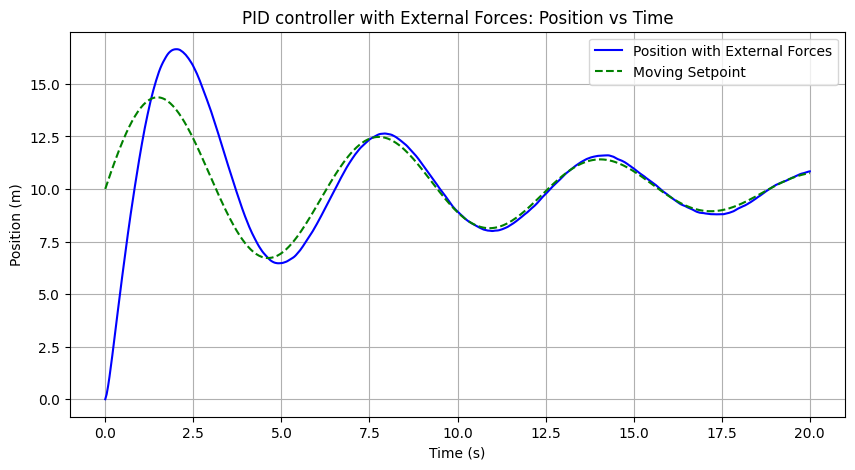

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(T, position, label='Position with External Forces', color='blue')
plt.plot(T, moving_setpoints, label='Moving Setpoint', color='green', linestyle='--')
plt.title('PID controller with External Forces: Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid()
plt.show()